In [77]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [78]:
# load the dataset
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [79]:
inputs = df.drop('salary_more_than_100k',axis='columns')
target = df['salary_more_than_100k']

In [80]:
# create the Label Encoder for each input
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [81]:
# fit and transform the columns
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [82]:
# drop the columns
inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [83]:
# train and test data
x_train,x_test,y_train,y_test = train_test_split(inputs_n,target,test_size=0.3,random_state=42)

In [84]:
# create and train the model
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [85]:
# model's score or accuracy
print(f"Model's Accuracy: {model.score(x_test,y_test) * 100:.2f}%")

Model's Accuracy: 80.00%


In [86]:
# predictions
print("Predictions:", model.predict(x_test))
print("Oriiginal:", np.array(y_test))

Predictions: [0 0 0 1 1]
Oriiginal: [0 0 1 1 1]


In [87]:
# confusion matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[2 0]
 [1 2]]


Text(95.72222222222221, 0.5, 'True')

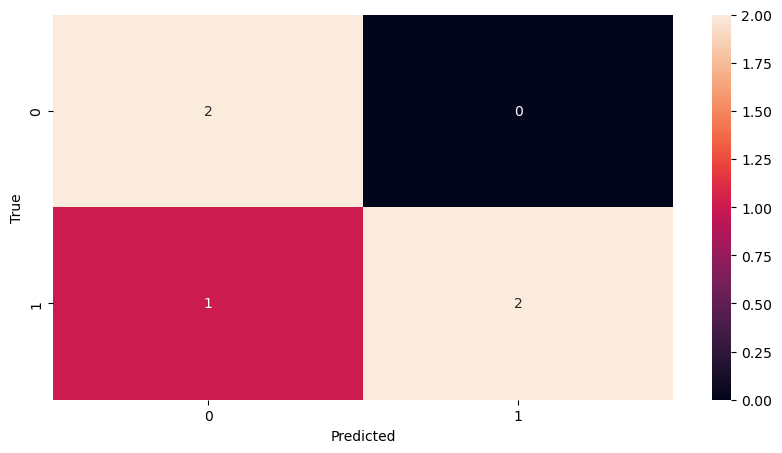

In [88]:
# confusion matrix heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")